# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
print("Number of rows: {:,}".format(df.shape[0])) # Can also use len(df) to get the number of rows
print("Number of columns:", df.shape[1])

Number of rows: 1,898
Number of columns: 9


#### Observations:

There are 1,898 rows and 9 columns of data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:



1.   There does not appear to be any null or missing data.  Although there are some rows with a rating of "Not given".  This should be treated as null or NaN so that the column can be convereted to an int32 or int64 datatype and we can do statistical analysis on it.
2.   Food prep time and delivery time are both int64.  This tells me that the data in those columns are valid.  Although, we should take a deeper look at the number (min/max/mean/etc.) to be sure.
3. Same with the cost column.  It was converted to float64, indicating that the data looks good.  Need to do a deeper analysis to verify that this is the case.

Overall, it looks like the data is clean and each row contains valid data in each column.  Also, the data appears to be normalized, meaning the names of the restaurants are all spelled the same.  For example, 'Shake Shack' is all spelled that way instead of different spellings/casing.  This will allow us to start the analysis rather than spend some time cleaning the data.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:
df2 = df.replace('', np.nan)  # Replace any blank cells with NaN
df2.isnull().sum()            # Search for null cells by column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

Based on the outputs above, there does not appear to be any null or missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [8]:
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [9]:
col = 'food_preparation_time'

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Determine the average food preparation time and convert to minutes and seconds
avg = df.mean().loc[col]
avg_minutes, avg_rem = divmod(avg, 1)
avg_seconds = avg_rem * 60

# Print out the results
print("Minimum food preparation time: {} minutes".format(df.min().loc[col]))
print("Maximum food preparation time: {} minutes".format(df.max().loc[col]))
print("Average food preparation time: {:.0f} minutes and {:.0f} seconds ({:.2f} minutes)".format(avg_minutes, avg_seconds, avg))

Minimum food preparation time: 20 minutes
Maximum food preparation time: 35 minutes
Average food preparation time: 27 minutes and 22 seconds (27.37 minutes)


#### Observations:

The minimum food preparation time was 20 minutes.
The maximum food preparation time was 35 minutes.
The average food preparation time was 27.37 minutes or 27 minutes and 22 seconds.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
print(df['rating'].value_counts().iloc[0], "orders did not receive a rating.")

736 orders did not receive a rating.


#### Observations:

736 orders were not rated by the customer.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

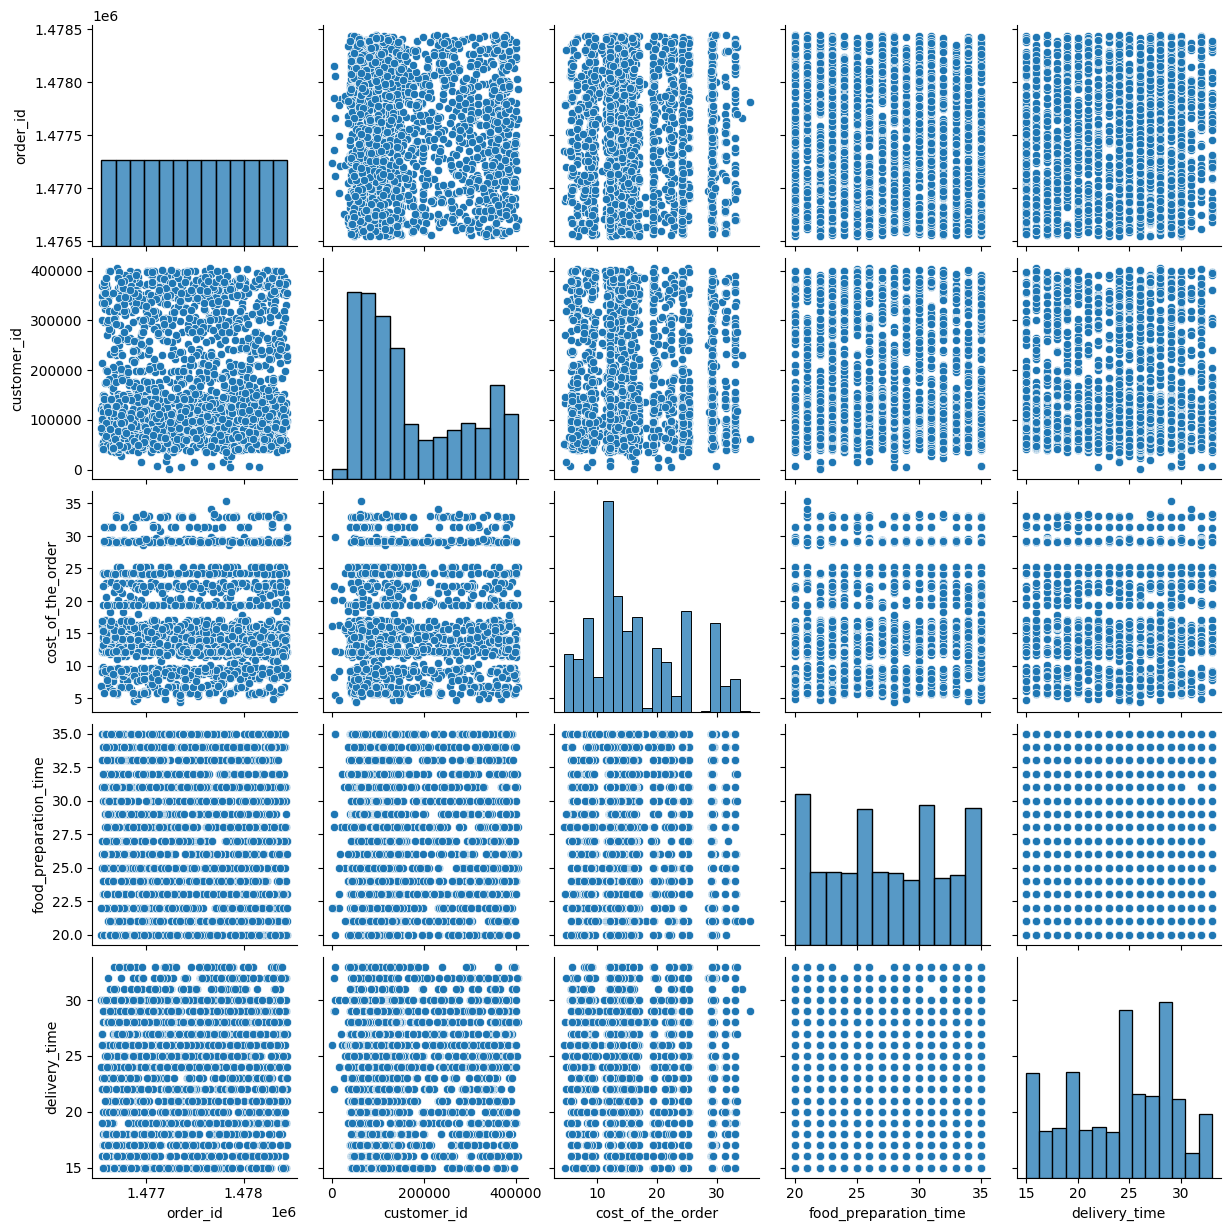

In [11]:
# Write the code here

sns.pairplot(data=df);

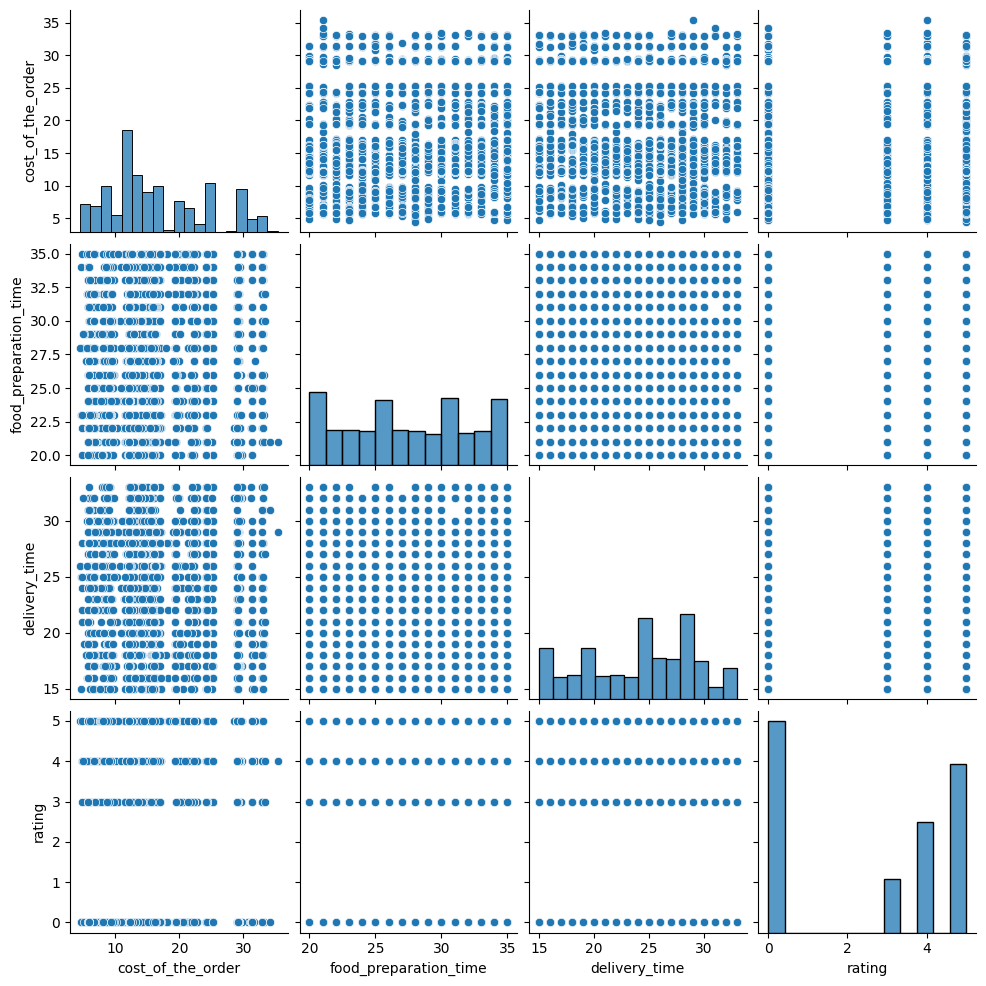

In [12]:
# List of numerical values (excluding the categorical values)
num_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

df2 = df[num_list]                                    # Extract the numerical columns and save to a new dataframe
df2['rating'].replace('Not given', '0', inplace=True) # Convert the 'Not given' ratings to zero and save it in place
df3 = df2.astype({'rating': 'int64'})                 # Convert the ratings column to an int64 data type
sns.pairplot(data=df3);                               # Plot the dataframe


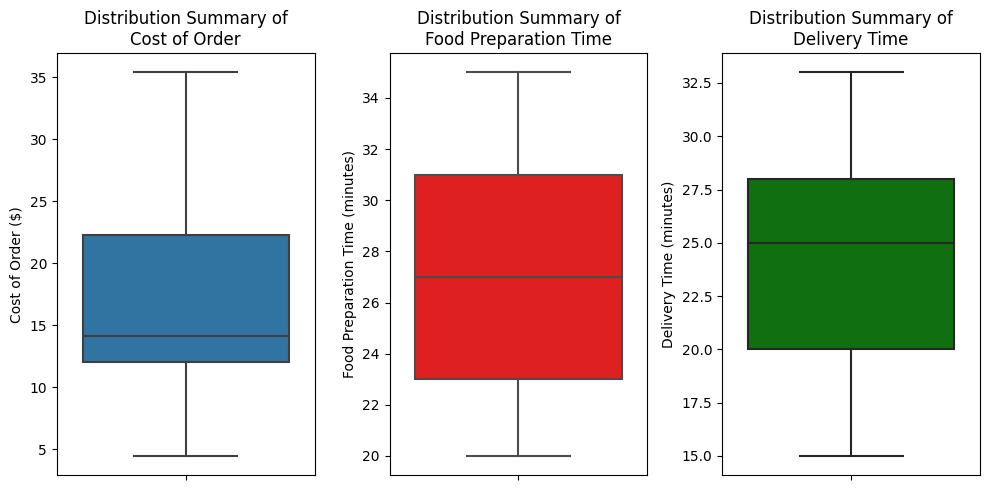

In [13]:
boxplot_title = 'Distribution Summary of\n'
cost_title='Cost of Order'
food_prep_title='Food Preparation Time'
delivery_title='Delivery Time'
minutes=' (minutes)'

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(ncols=3)
bp1 = sns.boxplot(y=df['cost_of_the_order'], ax=ax[0]);
bp1.set(ylabel=cost_title + ' ($)', title=boxplot_title + cost_title)
bp2 = sns.boxplot(y=df['food_preparation_time'], ax=ax[1], color='red');
bp2.set(ylabel=food_prep_title + minutes, title=boxplot_title + food_prep_title)
bp3 = sns.boxplot(y=df['delivery_time'], ax=ax[2], color='green');
bp3.set(ylabel=delivery_title + minutes, title=boxplot_title + delivery_title)
plt.show()

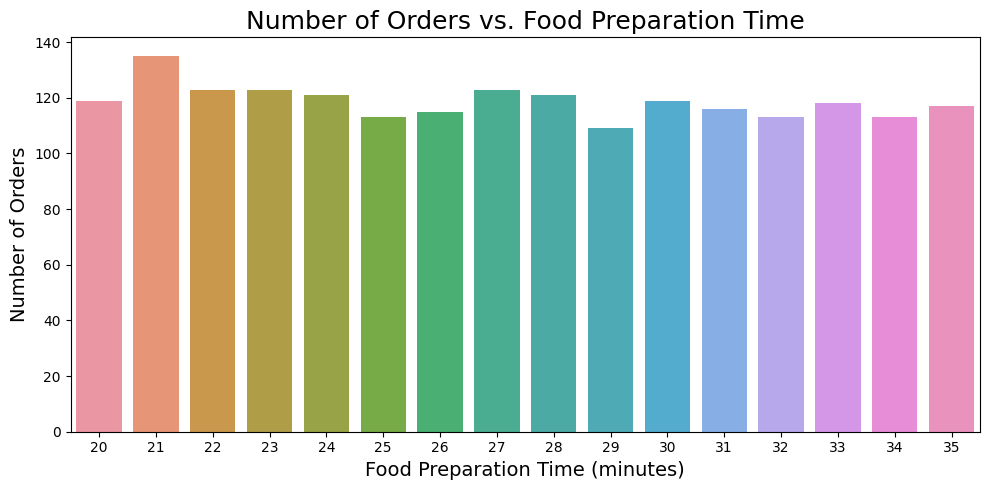

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.food_preparation_time);
plt.title('Number of Orders vs. Food Preparation Time', fontsize=18)
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

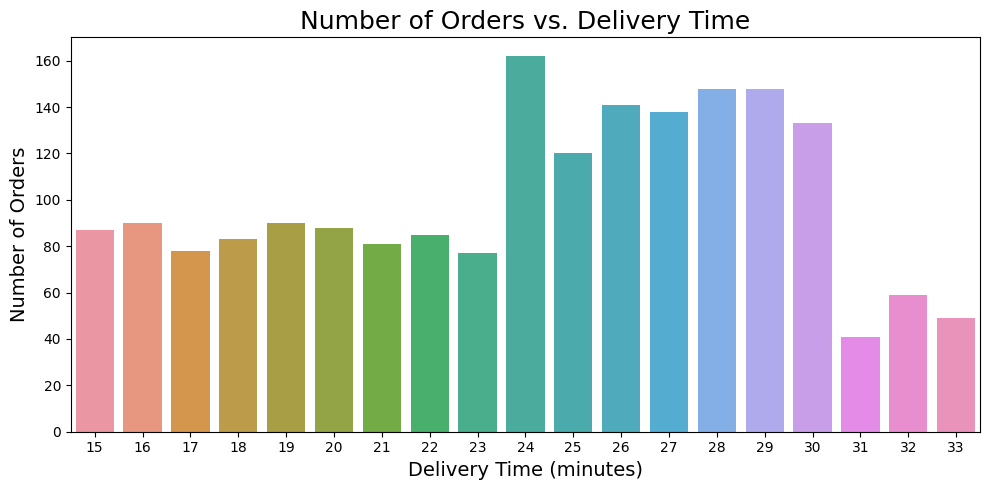

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.delivery_time);
plt.title('Number of Orders vs. Delivery Time', fontsize=18)
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

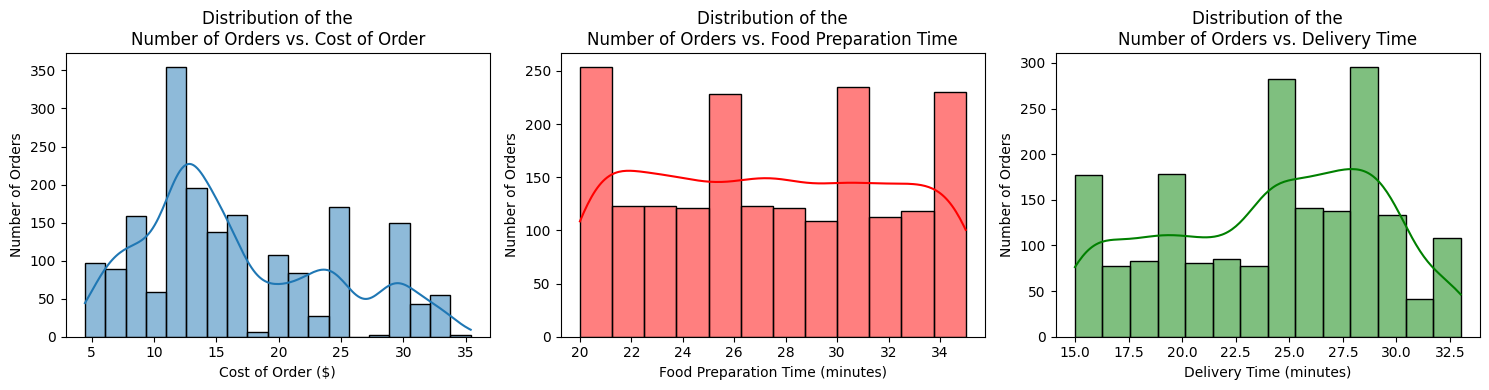

In [16]:
yLabel='Number of Orders'
plot_title = 'Distribution of the\n' + yLabel + ' vs. '
cost_title='Cost of Order'
food_prep_title='Food Preparation Time'
delivery_title='Delivery Time'
minutes= ' (minutes)'

plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(ncols=3)
hp1 = sns.histplot(x=df['cost_of_the_order'], ax=ax[0], kde=True);
hp1.set(xlabel=cost_title + ' ($)', ylabel=yLabel, title=plot_title + cost_title)
hp2 = sns.histplot(x=df['food_preparation_time'], ax=ax[1], color='red', kde=True);
hp2.set(xlabel=food_prep_title + minutes, ylabel=yLabel, title=plot_title + food_prep_title)
hp3 = sns.histplot(x=df['delivery_time'], ax=ax[2], color='green', kde=True);
hp3.set(xlabel=delivery_title + minutes, ylabel=yLabel, title=plot_title + delivery_title)
plt.show()


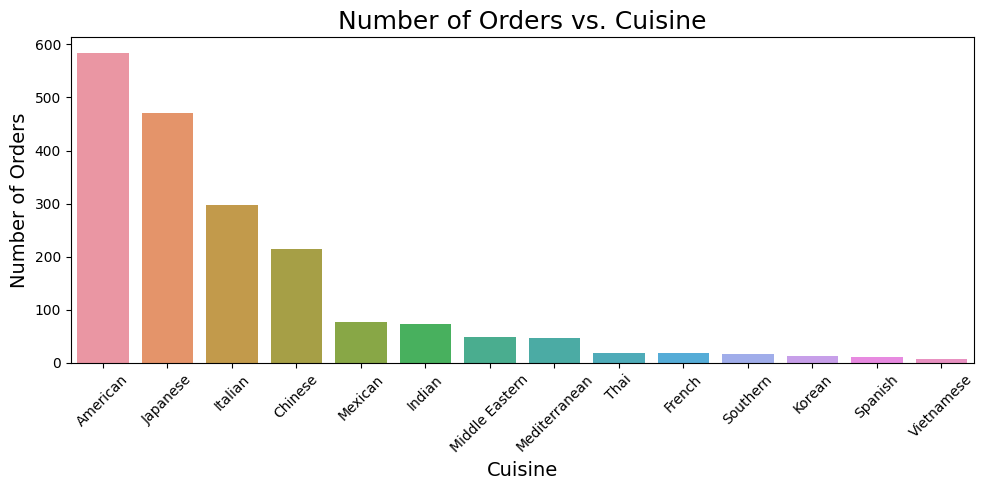

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.cuisine_type, order=df['cuisine_type'].value_counts().index);
plt.title('Number of Orders vs. Cuisine', fontsize=18)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()

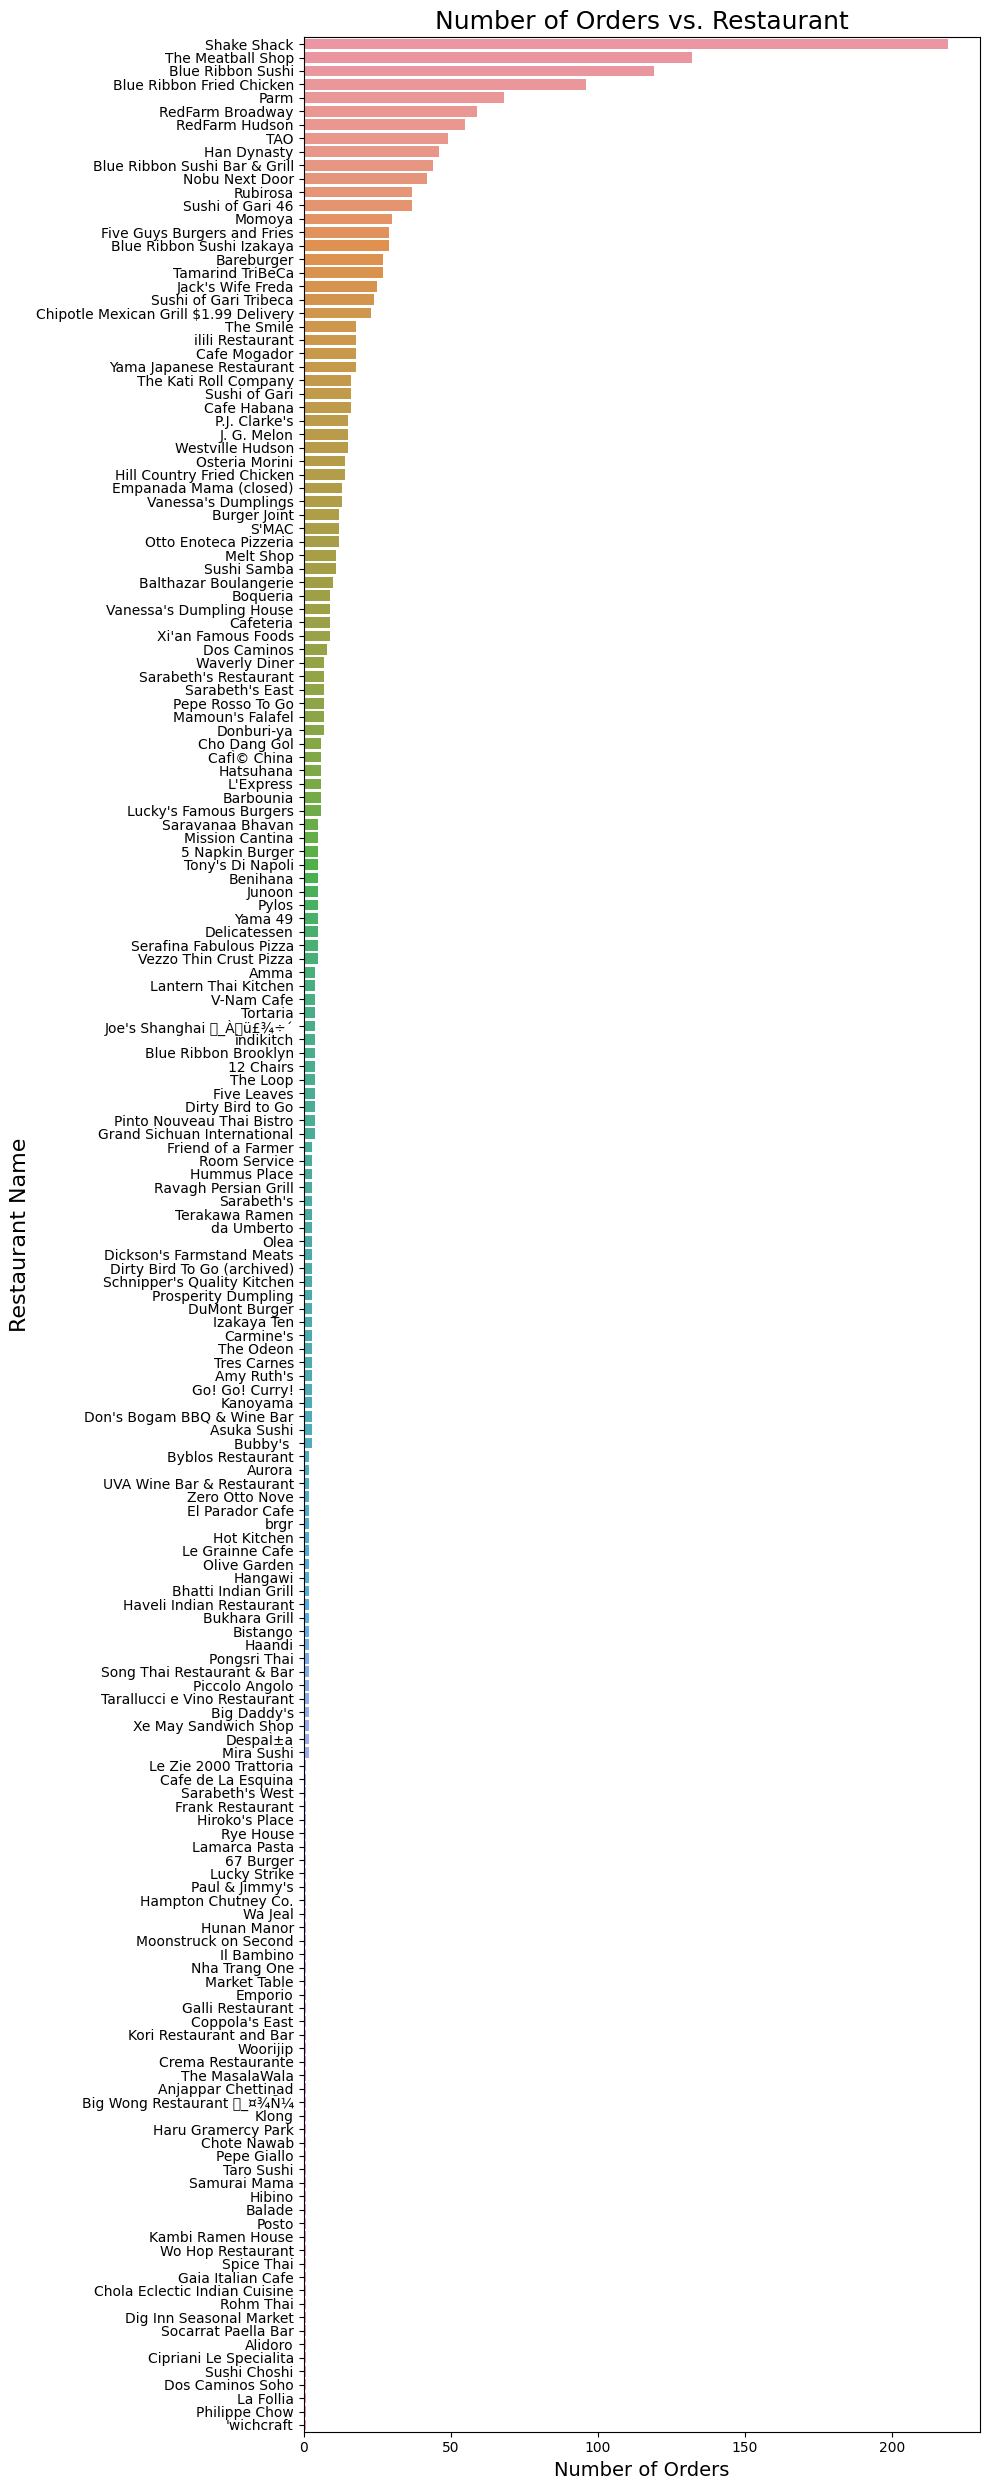

In [18]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df.restaurant_name, order=df['restaurant_name'].value_counts().index);
plt.title('Number of Orders vs. Restaurant', fontsize=18)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=16)
plt.show()

#### Observations:

Based on the pairplot and the correlation table, there doesn't seem to be any kind of correlation between any of the numerical values.

Looking at the distribution plots, cost has a peak around $11.  Food prep and delivery times are pretty even across, but they look to be multi-modal.

Looking at the count plots, the most popular cuisine is American, while the most popular restaurant is Shake Shack.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here

# Note: value_counts() sort default is true and descending order is the default
#   sort=True, ascending=False
df['restaurant_name'].value_counts().head(6)
# Return 6 instead of 5 in case there are ties for 5th place

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
Name: restaurant_name, dtype: int64

#### Observations:

The 5 restaurants with the most orders received, in descending order are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Write the code here
cuisine = df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts().head(1)
print('The most popular cuisine on weekends is {} with {} orders.'.format(cuisine.index.values[0], cuisine.iloc[0]))

The most popular cuisine on weekends is American with 415 orders.


In [21]:
cuisine = df.loc[df['day_of_the_week'] == 'Weekday', 'cuisine_type'].value_counts().head(1)
print('The most popular cuisine on weekdays is {} with {} orders.'.format(cuisine.index.values[0], cuisine.iloc[0]))

The most popular cuisine on weekdays is American with 169 orders.


#### Observations:

The most popular cuisine on weekends in American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
total_rows = df.shape[0]
orders_over_20 = df.loc[df['cost_of_the_order'] > 20].shape[0]
percentage = orders_over_20/total_rows

print('Total number of orders = {:,}'.format(total_rows))
print('Number of orders over $20 = {}'.format(orders_over_20))
print('\nThe percentage of orders over $20 is {:.2%}.'.format(percentage))

Total number of orders = 1,898
Number of orders over $20 = 555

The percentage of orders over $20 is 29.24%.


#### Observations:

29.24% of the orders are over $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here
avg = df['delivery_time'].mean()
avg_minutes, avg_rem = divmod(avg, 1)
avg_seconds = avg_rem * 60

print('The mean order delivery time is {:.2f} minutes or {:.0f} minutes and {:.0f} seconds.'.format(avg, avg_minutes, avg_seconds))

The mean order delivery time is 24.16 minutes or 24 minutes and 10 seconds.


#### Observations:

The mean order delivery time is around 24 minutes and 10 seconds (24.16).

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here
df['customer_id'].value_counts().head()
# Return top 5 in case there are ties for 3rd place

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [25]:
total = df['customer_id'].value_counts().head().sum()
percent = total/len(df)
print('The top 5 customers account for {:.1%} of the total number of orders.'.format(percent))

The top 5 customers account for 2.5% of the total number of orders.


#### Observations:


### Multivariate Analysis

The top 3 customers by ID and the number of orders they placed are:
1. 52832 (13)
2. 47440 (10)
3. 83287 ( 9)

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


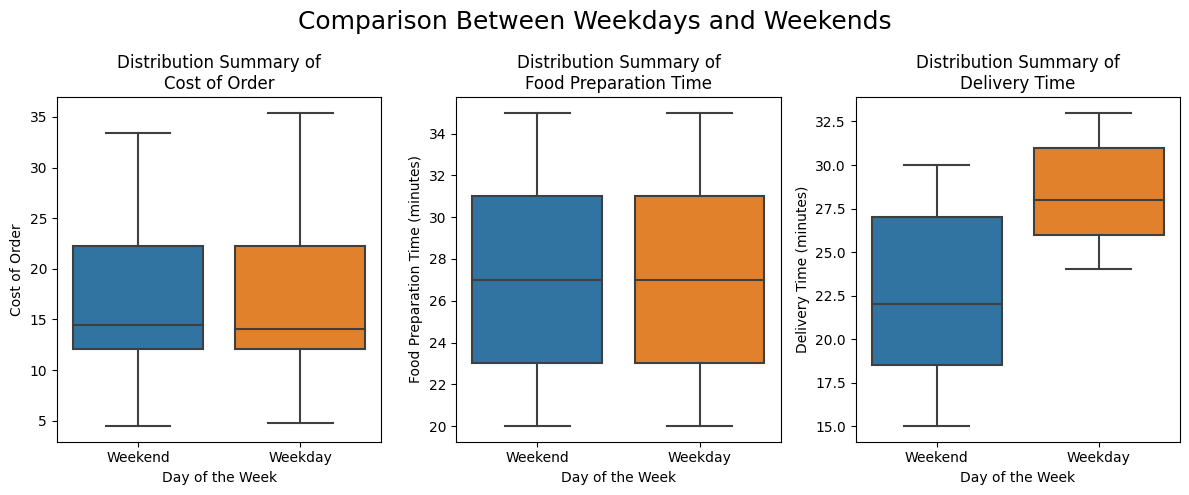

In [26]:
# Write the code here

xVar='day_of_the_week'
xLabel='Day of the Week'
plot_title='Distribution Summary of\n'
cost_title='Cost of Order'
food_prep_title='Food Preparation Time'
delivery_title='Delivery Time'
minutes=' (minutes)'

plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(ncols=3)
bp1 = sns.boxplot(data=df, x=xVar, y='cost_of_the_order', ax=ax[0]);
bp1.set(xlabel=xLabel, ylabel=cost_title, title=plot_title + cost_title)
bp2 = sns.boxplot(data=df, x=xVar, y='food_preparation_time', ax=ax[1]);
bp2.set(xlabel=xLabel, ylabel=food_prep_title + minutes, title=plot_title + food_prep_title)
bp3 = sns.boxplot(data=df, x=xVar, y='delivery_time', ax=ax[2]);
bp3.set(xlabel=xLabel, ylabel=delivery_title + minutes, title=plot_title + delivery_title)
plt.suptitle('Comparison Between Weekdays and Weekends', fontsize=18)
plt.show()

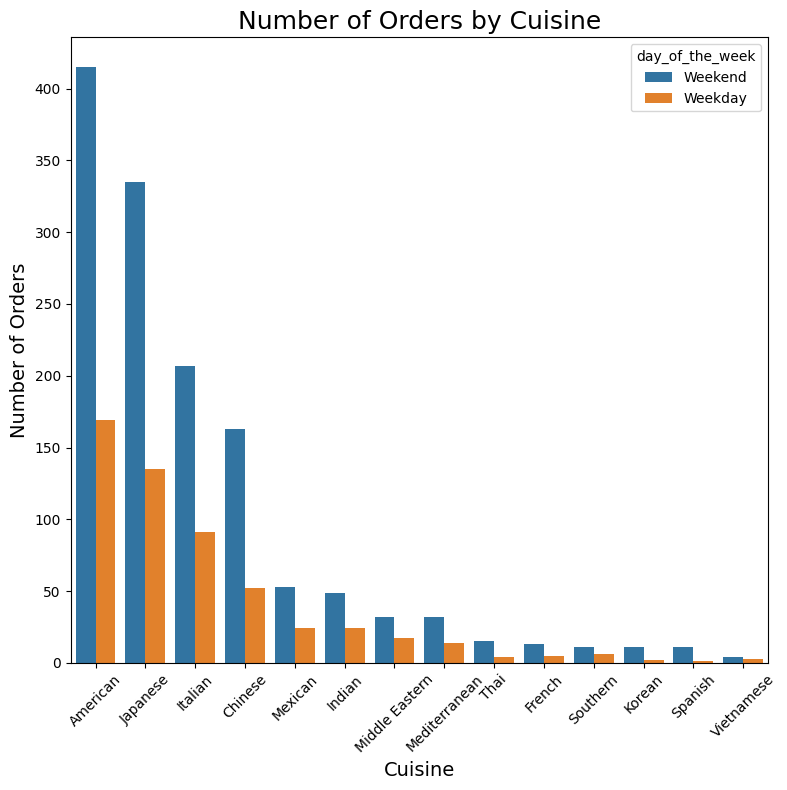

In [27]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=df['cuisine_type'].value_counts().index);
plt.title('Number of Orders by Cuisine', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

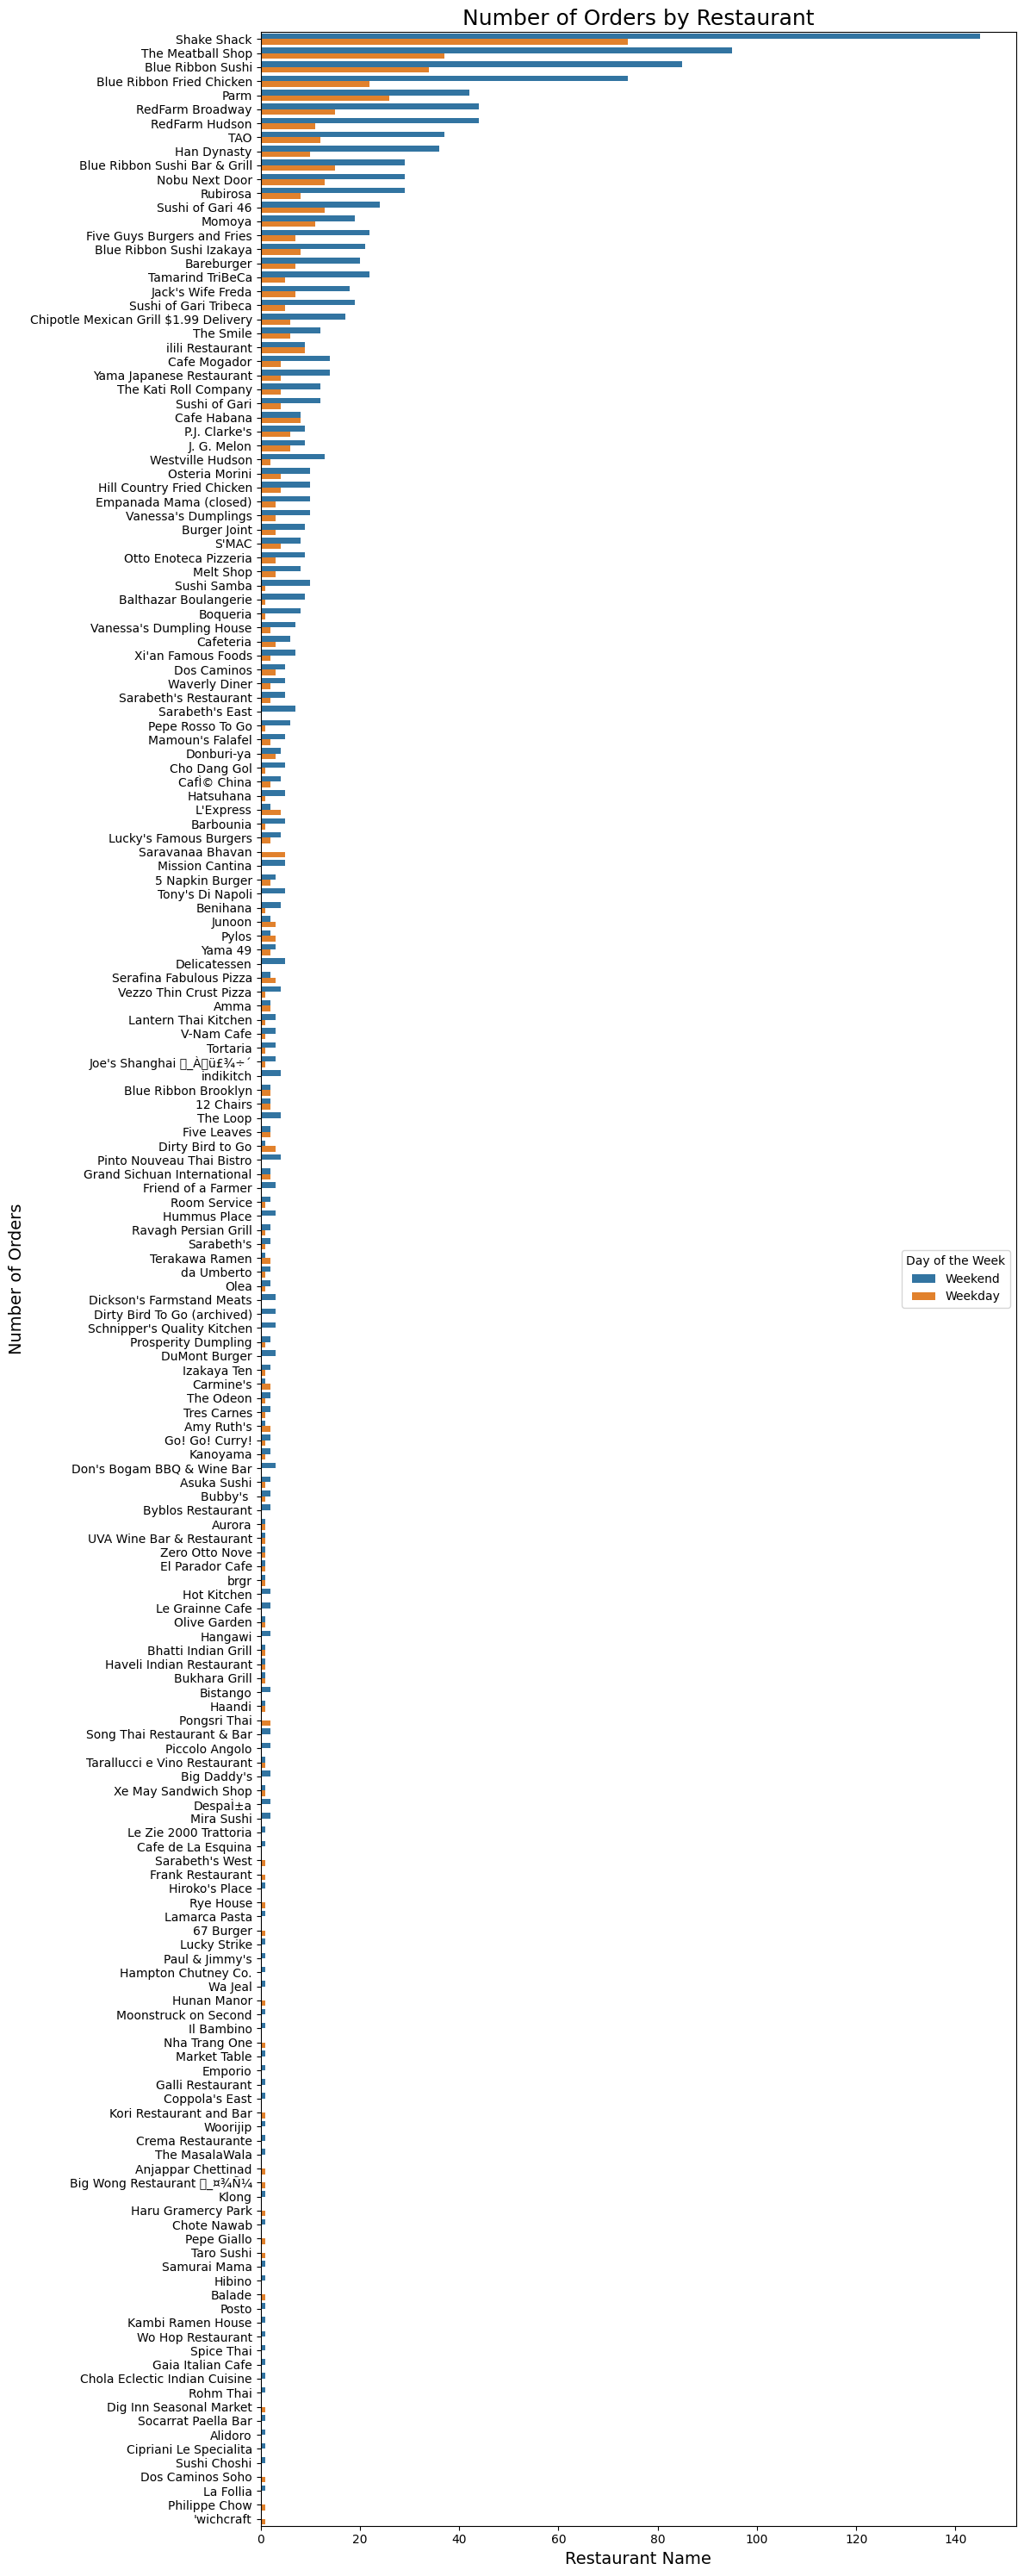

In [28]:
yVar='restaurant_name'

plt.figure(figsize=(12, 30))
sns.countplot(data=df, y=yVar, hue='day_of_the_week', order=df[yVar].value_counts().index);
plt.title('Number of Orders by Restaurant', fontsize=18)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.legend(loc='right', title='Day of the Week')
plt.show()

In [29]:
########################################################
# Step 1: Prepare some variables

# Create a copy of the data
df2 = df.copy()

# Setup some constants
rest_name = 'restaurant_name'
food_prep_time = 'food_preparation_time'
del_time = 'delivery_time'
total_time = 'total_time'

########################################################
# Step 2: Compute the total time from food prep to delivery
#
# Save results to a new column
df2[total_time] = df[food_prep_time] + df[del_time]

########################################################
# Step 3: Group by restaurants and compute the mean

df3 = df2.groupby(rest_name, as_index=False)[food_prep_time, del_time, total_time].mean()

########################################################
# Step 4: Sort the results and output results

# Sort food prep time in descending order and restaurants in ascending order and get the top 10 restaurants
df4 = df3.sort_values(by=[food_prep_time, rest_name], ascending=[False, True]).loc[:, [rest_name, food_prep_time]].head(10)
df4

# Note: The above variables will be reused in the next few code cells.

,restaurant_name,food_preparation_time
39,Cipriani Le Specialita,35.0
83,Kambi Ramen House,35.0
85,Klong,35.0
140,Sushi Choshi,35.0
148,Taro Sushi,35.0
4,Alidoro,34.0
17,Big Wong Restaurant _¤¾Ñ¼,34.0
77,Il Bambino,34.0
139,Spice Thai,34.0
74,Hot Kitchen,33.0


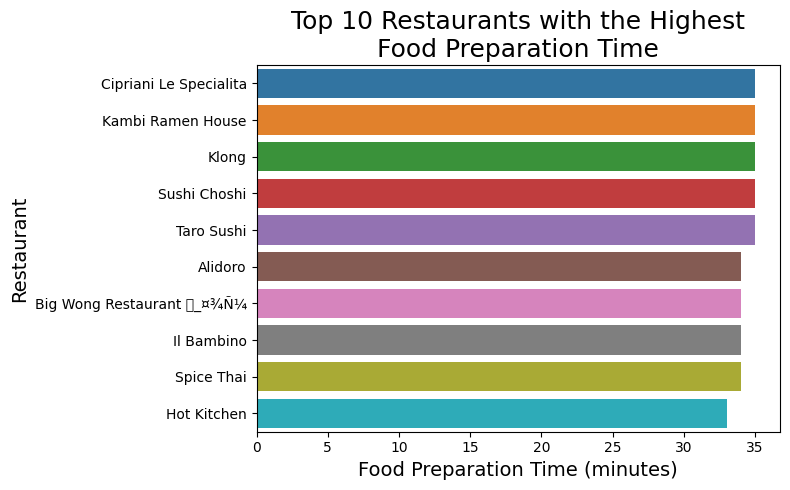

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.food_preparation_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Highest\nFood Preparation Time', fontsize=18)
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [31]:
# Sort food prep time and restaurant names in ascending order and get the 10 restaurants with the fastest food prep times
df4 = df3.sort_values(by=[food_prep_time, rest_name], ascending=[True, True]).loc[:, [rest_name, food_prep_time]].head(10)
df4

,restaurant_name,food_preparation_time
3,67 Burger,20.0
58,Frank Restaurant,20.0
68,Haru Gramercy Park,20.0
43,DespaÌ±a,20.5
7,Anjappar Chettinad,21.0
65,Hampton Chutney Co.,21.0
93,Lucky Strike,21.0
96,Market Table,21.0
128,Samurai Mama,21.0
132,Sarabeth's West,21.0


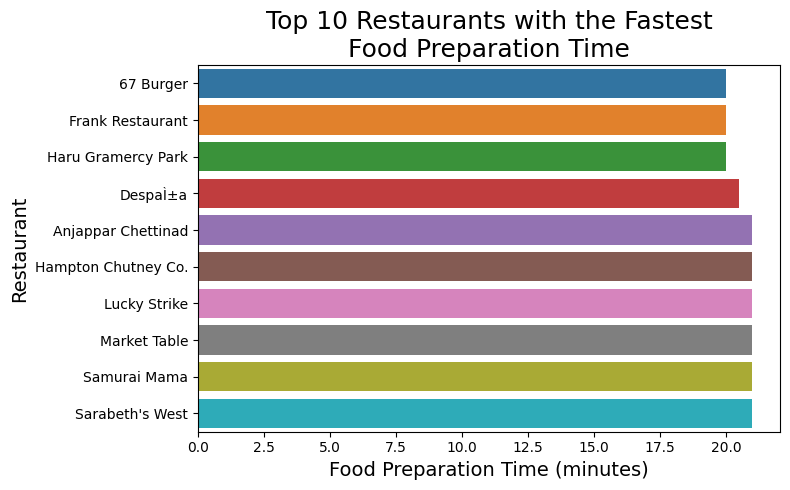

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.food_preparation_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Fastest\nFood Preparation Time', fontsize=18)
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [33]:
# Sort delivery time in descending order and restaurants in ascending order and get the top 10 restaurants
df4 = df3.sort_values(by=[del_time, rest_name], ascending=[False, True]).loc[:, [rest_name, del_time]].head(10)
df4

,restaurant_name,delivery_time
132,Sarabeth's West,33.0
68,Haru Gramercy Park,32.0
148,Taro Sushi,32.0
58,Frank Restaurant,31.0
64,Haandi,30.5
34,Carmine's,30.0
38,Chote Nawab,30.0
39,Cipriani Le Specialita,30.0
41,Crema Restaurante,30.0
51,Dos Caminos Soho,30.0


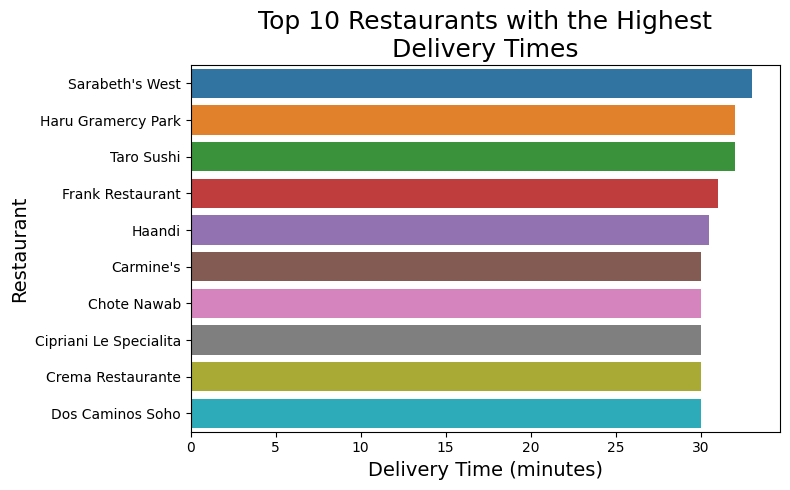

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.delivery_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Highest\nDelivery Times', fontsize=18)
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [35]:
# Sort delivery time and restaurant names in ascending order and get the 10 restaurants with the fastest delivery times
df4 = df3.sort_values(by=[del_time, rest_name], ascending=[True, True]).loc[:, [rest_name, del_time]].head(10)
df4

,restaurant_name,delivery_time
60,Gaia Italian Cafe,15.0
71,Hibino,15.0
110,Paul & Jimmy's,15.0
152,The MasalaWala,15.0
40,Coppola's East,16.0
61,Galli Restaurant,16.0
167,Wo Hop Restaurant,16.0
96,Market Table,17.0
28,Byblos Restaurant,18.0
128,Samurai Mama,18.0


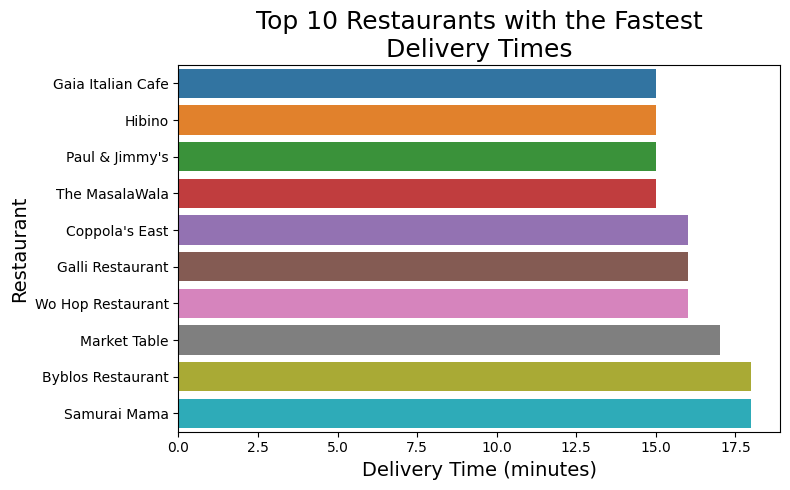

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.delivery_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Fastest\nDelivery Times', fontsize=18)
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [37]:
# Sort total time in descending order and restaurants in ascending order and get the top 10 restaurants
df4 = df3.sort_values(by=[total_time, rest_name], ascending=[False, True]).loc[:, [rest_name, total_time]].head(10)
df4

,restaurant_name,total_time
148,Taro Sushi,67.00
39,Cipriani Le Specialita,65.00
77,Il Bambino,63.00
17,Big Wong Restaurant _¤¾Ñ¼,62.00
140,Sushi Choshi,62.00
41,Crema Restaurante,61.00
63,Grand Sichuan International,60.25
98,Mira Sushi,60.00
74,Hot Kitchen,59.50
34,Carmine's,59.00


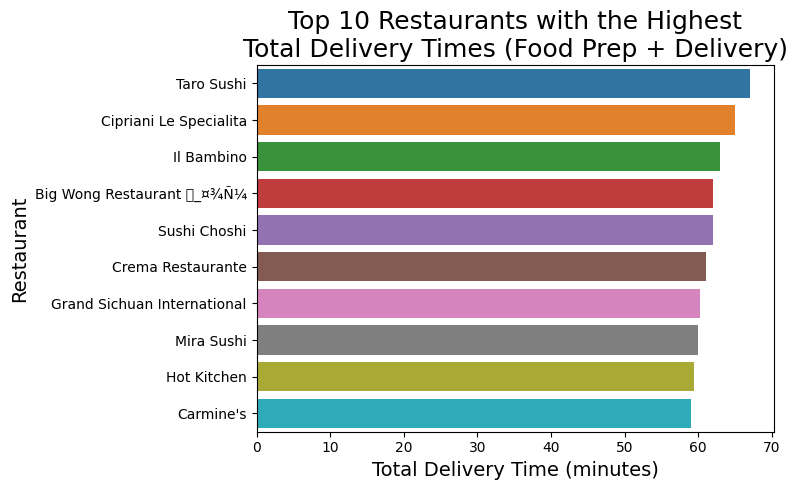

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.total_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Highest\nTotal Delivery Times (Food Prep + Delivery)', fontsize=18)
plt.xlabel('Total Delivery Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [39]:
# Sort total time and restaurant names in ascending order and get the top 10 restaurants with the fastest delivery times
df4 = df3.sort_values(by=[total_time, rest_name], ascending=[True, True]).loc[:, [rest_name, total_time]].head(10)
df4

,restaurant_name,total_time
61,Galli Restaurant,38.0
96,Market Table,38.0
167,Wo Hop Restaurant,38.0
128,Samurai Mama,39.0
43,DespaÌ±a,40.0
60,Gaia Italian Cafe,40.0
65,Hampton Chutney Co.,41.0
89,Lamarca Pasta,42.0
93,Lucky Strike,42.0
71,Hibino,43.0


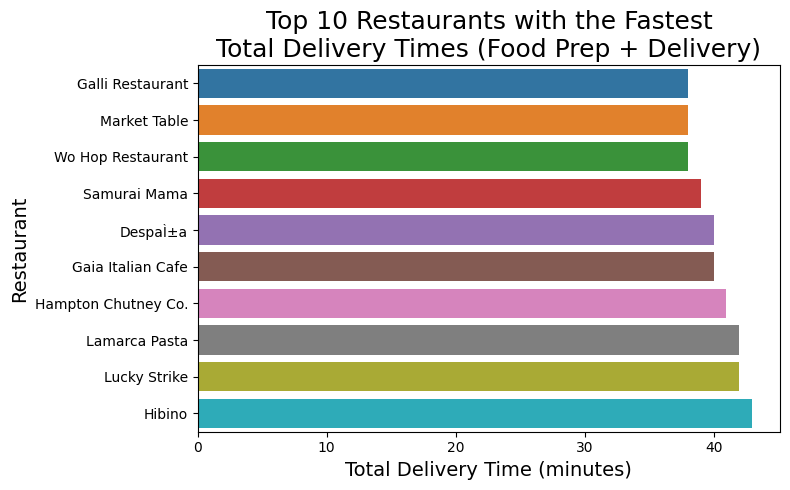

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df4.total_time, y=df4.restaurant_name)
plt.title('Top 10 Restaurants with the Fastest\nTotal Delivery Times (Food Prep + Delivery)', fontsize=18)
plt.xlabel('Total Delivery Time (minutes)', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

In [41]:
########################################################
# Step 1: Prepare some variables

# Create a copy of the data
df2 = df.copy()

# Setup some constants
rest_name = 'restaurant_name'
cost = 'cost_of_the_order'
total_order = 'total_order'
avg_order = 'avg_order'
count_of_orders = 'count_of_orders'

########################################################
# Step 2: Do some computations

# Compute the total cost of orders, the average cost of orders by restaurant
# and the total number of orders

df3 = (df2.groupby(rest_name, as_index=False)
        .agg(total_order=(cost, 'sum'),
             avg_order=(cost, 'mean'),
             count_of_orders=(cost, 'count')
             ))

########################################################
# Step 3: Sort and output results

# Sort by total orders in descending order and restaurant name in ascending order
# and return the top 10 restaurants
df3.sort_values(by=[total_order, rest_name], ascending=[False, True]).loc[:, [rest_name, count_of_orders, total_order]].head(10)

# Note: The above variables will be reused in the next few code cells.

,restaurant_name,count_of_orders,total_order
136,Shake Shack,219,3579.53
153,The Meatball Shop,132,2145.21
21,Blue Ribbon Sushi,119,1903.95
20,Blue Ribbon Fried Chicken,96,1662.29
109,Parm,68,1112.76
121,RedFarm Broadway,59,965.13
122,RedFarm Hudson,55,921.21
145,TAO,49,834.50
66,Han Dynasty,46,755.29
22,Blue Ribbon Sushi Bar & Grill,44,666.62


In [42]:
# Sort by count of orders and average cost of orders in descending order,
# then by restaurant name in ascending order and return the top 10 restaurants
df4 = df3.sort_values(by=[count_of_orders, avg_order, rest_name], ascending=[False, False, True]).loc[:, [rest_name, count_of_orders, avg_order]].head(10)
df4

,restaurant_name,count_of_orders,avg_order
136,Shake Shack,219,16.344886
153,The Meatball Shop,132,16.251591
21,Blue Ribbon Sushi,119,15.999580
20,Blue Ribbon Fried Chicken,96,17.315521
109,Parm,68,16.364118
121,RedFarm Broadway,59,16.358136
122,RedFarm Hudson,55,16.749273
145,TAO,49,17.030612
66,Han Dynasty,46,16.419348
22,Blue Ribbon Sushi Bar & Grill,44,15.150455


In [43]:
df4.describe()

,count_of_orders,avg_order
count,10.000000,10.000000
mean,88.700000,16.398352
std,55.445769,0.587650
min,44.000000,15.150455
25%,50.500000,16.274915
50%,63.500000,16.361127
75%,113.250000,16.666792
max,219.000000,17.315521


### Observations:

Looking at the boxplots that compares the costs, food prep, and delivery times between weekday and weekends, we can observe the following:

* There does not seems to be any outliers in any of the boxplots.
* Costs:
  * The interquartile range is roughly the same.
  * The average cost of a meal is slightly higher on weekends than weekdays.
  * The range is bigger on weekdays compared to weekends.
* Food Prep Time:
  * Food prep time is roughly the same between weekdays and weekends.
* Delivery Time:
  * Delivery takes longer on weekdays than on weekends.

Comparing the number of orders by cuisine or restaurants, we see a significant difference between weekend vs. weekday.  Weekends show almost double the orders compared to weekdays.

Delivery on weekdays takes longer than weekends.  This merits further investigation.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
# Write the code here

########################################################
# Step 1: Prepare the variables

rating='rating'
rest_name='restaurant_name'

df2 = df.copy()                                                     # Make a copy of the original data
df3 = df2.drop(df2[df2[rating] == 'Not given'].index).reset_index() # Drop all rows with no ratings and reset the indices; save output to a new dataframe
df3 = df3.astype({rating: 'int64'})                                 # Convert rating column data type from object to int64

# df3 contains only orders with a valid rating

########################################################
# Step 2: Get list of restaurants with more than 50 ratings
#
# Each row in df3 represents an order with a valid rating

df4 = df3.value_counts(rest_name) > 50
df5 = df4[df4 == True]
restaurant_list = df5.index.to_list()

# restaurant_list contains a list of restaurants with more than 50 ratings

########################################################
# Step 3: Get the average rating for each restaurant in the list
#
# Extract rows from df3 where the restaurant name matches the list restaurant_list
# Then group by restaurant and get the average rating
# Save the output to df4 (overwrite df4)

df4 = df3.loc[df3[rest_name].isin(restaurant_list)].groupby([rest_name])[rating].mean()

########################################################
# Step 4: Get a list of restaurants with average rating higher than 4.
#
# Save the output to df5 (overwrite df5)

df5 = df4.loc[df4 > 4]
df5

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:

The list of restaurants with more than 50 valid ratings and where the average rating is more than 4.

1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
# Write the code here

########################################################
# Step 1: Prepare some variables that we're going to use
#

# Create a copy of the data
df2 = df.copy()

# Setup some constants
commission = 'commission'
cost = 'cost_of_the_order'
revenue = 'revenue'

########################################################
# Step 2: Separate all orders into bins
#
#   bin 0 = $0 to $5
#   bin 0.15 = $5 to $25
#   bin 0.25 = $25+
# Save results to a new column called 'commission'

max_cost = df[cost].max()

bins = [0, 5, 20, max_cost]
labels = [0, 0.15, 0.25]
df2[commission] = pd.cut(df[cost], bins=bins, labels=labels)

########################################################
# Step 3: Convert the new column to float64 data type

df2 = df2.astype({commission: 'float64'})

########################################################
# Step 4: Compute the revenue for each order
#
# Multiply cost * commission
# Save results to a new column called revenue

df2[revenue] = df2[cost] * df2[commission]

########################################################
# Step 5: Sum up the revenue column and output the results

net_revenue = df2[revenue].sum()
print("The company's net revenue is ${:,.2f}.".format(net_revenue))

The company's net revenue is $6,166.30.


#### Observations:

The company's net revenue is $6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
# Write the code here

########################################################
# Step 1: Prepare some variables

# Create a copy of the data
df2 = df.copy()

# Setup some constants
total_time = 'total_time'
cut_off = 60                # In minutes

########################################################
# Step 2: Compute the total time from food prep to delivery
# Save results to a new column

df2[total_time] = df['food_preparation_time'] + df['delivery_time']

########################################################
# Step 3: Count the number of rows where the total time is greater than the cut-off time

num_orders = len(df2[df2[total_time] > cut_off])
total_orders = len(df)
percentage = num_orders/total_orders

########################################################
# Step 4: Print out the results
print("The number of orders that took more than {} minutes is {}.\nThis represents {:.2%} of the total number of orders.".format(cut_off, num_orders, percentage))

The number of orders that took more than 60 minutes is 200.
This represents 10.54% of the total number of orders.


#### Observations:

The number of orders that took more than 60 minutes is 200.  This includes the food preparation time and delivery.

This is about 10.54% of the total number of orders in the dataset.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [47]:
# Write the code here

########################################################
# Step 1: Prepare some variables

# Create a copy of the data
df2 = df.copy()

# Setup some constants
total_time = 'total_time'
cut_off = 60                # In minutes

########################################################
# Step 2: Compute the total time from food prep to delivery
# Save results to a new column

df2[total_time] = df['food_preparation_time'] + df['delivery_time']

########################################################
# Step 3: Compute the mean and output the results

df3 = df2.groupby('day_of_the_week')['food_preparation_time', 'delivery_time', 'total_time'].mean()
df3

,food_preparation_time,delivery_time,total_time
day_of_the_week,,,
Weekday,27.212066,28.340037,55.552102
Weekend,27.436714,22.470022,49.906736


#### Observations:

The mean delivery time of orders between weekdays and weekends are:

1. Weekday = 55.55 minutes
2. Weekend = 49.90 minutes

It takes longer to deliver on weekdays compared to weekends.

Breaking down the averages between food prep and delivery, we see that it takes about the same amount of time to prep the food, but it takes about 6 minutes longer to deliver on weekdays compared to weekends.

This discrepancy in delivery times between weekdays vs. weekends merits further investigation.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The top 4 cuisines that people order are:
  * American
  * Japanese
  * Italian
  * Chinese
* The top 4 restaurants people order from are:
  * Shake Shack - 219 orders
  * The Meatball Shop - 132 orders
  * Blue Ribbon Sushi - 119 orders
  * Blue Ribbon Fried Chicken - 96 orders
* The average cost of orders for the top 4 restaurants are:
  * Shake Shack - \$16.34
  * The Meatball Shop - \$16.25
  * Blue Ribbon Sushi - \$16.00
  * Blue Ribbon Fried Chicken - \$17.32
* The same top 4 restaurants above have an average rating of more than 4 with over 50 ratings.
* The difference between total delivery times on weekdays vs weekends can be attributed to delivery time.  Delivery time on weekdays take longer on average (28 minutes) compared to weekends (22 minutes).
* 10.54% of the orders take longer than 60 minutes.
* The average cost of an order for the top 10 restaurants by volume is around \$16.40.  This is close to the mean for the whole dataset (\$16.50).


### Recommendations:

* The same 4 restaurants have the most recommendations, highest ratings, and most total orders.  I do not think that offering a promotion to them will incentivize people to order more.
* It would be interesting to investigate further why delivery on weekdays take longer than on weekends. We would need to collect more data, like distance from the restaurant to the final destination, time of the order, and traffic conditions.  Although, we could probably extrapolate traffic conditions based on the time of day.
* The top 5 customers by order account for 2.5% of the total number of orders.  Giving them a 20% discount would be a great idea and could encourage them to place more orders.  If the promotion was successful, the company could extend this to more customers to increase the number of orders placed.

---